## Tic-Tac-Toe Agent
​
In this notebook, you will learn to build an RL agent (using Q-learning) that learns to play Numerical Tic-Tac-Toe with odd numbers. The environment is playing randomly with the agent, i.e. its strategy is to put an even number randomly in an empty cell. The following is the layout of the notebook:
        - Defining epsilon-greedy strategy
        - Tracking state-action pairs for convergence
        - Define hyperparameters for the Q-learning algorithm
        - Generating episode and applying Q-update equation
        - Checking convergence in Q-values

#### Importing libraries
Write the code to import Tic-Tac-Toe class from the environment file

In [1]:
from TCGame_Env1 import TicTacToe
import collections
import numpy as np
import random
import pickle
import time
from matplotlib import pyplot as plt

In [2]:
# Function to convert state array into a string to store it as keys in the dictionary
# states in Q-dictionary will be of form: x-4-5-3-8-x-x-x-x
#   x | 4 | 5
#   ----------
#   3 | 8 | x
#   ----------
#   x | x | x

def Q_state(state):
    return ('-'.join('nan' if np.isnan(e) else str(int(e)) for row in state for e in row)).replace('nan', 'x')

In [3]:
def Action_to_str(action):
    location = action[0]
    value = action[1]
    return '-'.join([str(i) for i in location] + [str(value)])

def Action_str_to_action(action_str):
    action_components = action_str.split('-')
    location = np.array([int(action_components[0]), int(action_components[1])])
    value = int(action_components[2])
    return (location, value)

In [4]:
# Defining a function which will return valid (all possible actions) actions corresponding to a state
# Important to avoid errors during deployment.

def valid_actions(state):
    agent_action_space = env.action_space(state)[0]
    return agent_action_space

In [5]:
# Defining a function which will add new Q-values to the Q-dictionary. 
def add_to_dict(state):
    state_str = Q_state(state)
    
    valid_acts = valid_actions(state)
    
    if state_str not in Q_dict.keys():
        for action in valid_acts:
            action_str = Action_to_str(action)
            Q_dict[state_str][action_str]=0

#### Epsilon-greedy strategy - Write your code here

(you can build your epsilon-decay function similar to the one given at the end of the notebook)

In [6]:
# Defining epsilon-greedy policy. You can choose any function epsilon-decay strategy
max_epsilon = 1.0
min_epsilon = 0.001

def epsilon_greedy(state, time):
    epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-0.000001*time)
    z = np.random.random()
    
    # If epsilon is large enough at the start, z could be actually lesser than epsilon
    # and thus there is a bigger window for exploration.
    # If epsilon is very low at later episodes, z will mostly be greater than espsilon
    # and thus there is very narrow window for exploration
    
    # Q_dict[state_str][action_str]=0
    
    state_str = Q_state(state)
    
    if z > epsilon:
        action_str = max(Q_dict[state_str],key=Q_dict[state_str].get)   #Exploitation: this gets the action corresponding to max q-value of current state
        action = Action_str_to_action(action_str)
    else:
        valid_acts = valid_actions(state)
        valid_acts_n = len(valid_acts)
        valid_acts_index = np.random.choice(np.arange(valid_acts_n))    #Exploration: randomly choosing and action
        action = valid_acts[valid_acts_index]
    
    return action


#### Tracking the state-action pairs for checking convergence - write your code here

In [7]:
# Initialise Q_dictionary as 'Q_dict' and States_tracked as 'States_track' (for convergence)
Q_dict = collections.defaultdict(dict)

States_track = collections.defaultdict(dict)

#rewards_tracked = {(15,0):[],(25,1):[], (20,2): [], (30,3):[], (35,4):[], (10,5):[],(50,6):[]}


print(len(Q_dict))
#print(len(rewards_tracked))
print(len(States_track))

0
0


In [8]:
def empty_state():
    a_state = np.empty((3,3))
    a_state[:] = np.nan
    return a_state

# Initialise states to be tracked
def initialise_tracking_states():
    
    # State 1 and action 1
    s1 = empty_state()
    s1[0][0] = 5
    s1[2][0] = 4
    
    #   5 | x | x
    #   ----------
    #   x | x | x
    #   ----------
    #   4 | x | x
    
    a1 = (np.array([1,1]), 1)
    
    s1_a1 = (s1, a1)
    
    # State 2 and action 2
    s2 = empty_state()
    s2[2][2] = 7
    s2[0][2] = 6
    
    #   x | x | 6
    #   ----------
    #   x | x | x
    #   ----------
    #   x | x | 7
    
    a2 = (np.array([1,0]), 5)
    
    s2_a2 = (s2, a2)
    
    # State 3 and action 3
    s3 = empty_state()
    
    #   x | x | x
    #   ----------
    #   x | x | x
    #   ----------
    #   x | x | x
    
    a3 = (np.array([0,0]), 3)
    
    s3_a3 = (s3, a3)
    
    # State 4 and action 4
    s4 = empty_state()
    s4[2][2] = 7
    s4[0][0] = 6
    
    #   6 | x | x
    #   ----------
    #   x | x | x
    #   ----------
    #   x | x | 7
    
    a4 = (np.array([1,0]), 3)
    
    s4_a4 = (s4, a4)
    
    sample_q_values = [s1_a1, s2_a2, s3_a3, s4_a4]    #select any 4 Q-values
    for q_values in sample_q_values:
        state = q_values[0]
        action = q_values[1]
        
        state_str = Q_state(state)
        action_str = Action_to_str(action)
        
        States_track[state_str][action_str] = [] 
  

  

In [9]:
#Defining a function to save the Q-dictionary as a pickle file

def save_obj(obj, name ):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

In [10]:
def save_tracking_states():
    for state in States_track.keys():
        for action in States_track[state].keys():
            if state in Q_dict and action in Q_dict[state]:
                States_track[state][action].append(Q_dict[state][action])

In [11]:
initialise_tracking_states()

#### Define hyperparameters  ---write your code here

In [12]:
EPISODES = 800000
LR = 0.2                   #learning rate
GAMMA = 1
threshold = 1000       #every these many episodes, the 4 Q-values will be stored/appended (convergence graphs)
policy_threshold = 5000    #every these many episodes, the Q-dict will be updated

### Q-update loop ---write your code here

In [13]:
start_time = time.time()

for episode in range(EPISODES):
    ##### Start writing your code from the next line
    env = TicTacToe()      

    curr_state = np.copy(env.state)     # We start with a clean slate
    #   x | x | x
    #   ----------
    #   x | x | x
    #   ----------
    #   x | x | x
    
    
    add_to_dict(curr_state)
    
   
    terminal = False
    reward = None
    total_reward = 0
    
    
    agent_action = 0
    
    while not terminal:    #the episode will run until a terminal state is reached 
        agent_action += 1
        
        old_state = np.copy(curr_state)
                
        old_action = epsilon_greedy(old_state, episode)
        
        next_state, reward, is_terminal = env.step(curr_state, old_action)
        
        
        add_to_dict(next_state)
        
        
        # UPDATE RULE
        if is_terminal:
            # This is a terminal state so rewards from this state are 0 for any action
            Q_dict[old_state_str][old_action_str] += LR * (reward - Q_dict[old_state_str][old_action_str]) 
        else:
            next_state_str = Q_state(next_state)
            max_next_action_str = max(Q_dict[next_state_str],key=Q_dict[next_state_str].get)   #this gets the action corresponding to max q-value of next state

            old_state_str = Q_state(old_state)
            old_action_str = Action_to_str(old_action)
            
            Q_dict[old_state_str][old_action_str] += LR * ((reward + (GAMMA*(Q_dict[next_state_str][max_next_action_str]))) - Q_dict[old_state_str][old_action_str] ) 


        terminal = is_terminal
        curr_state = next_state

        total_reward += reward
    
    #TRACKING Q-VALUES
    if (episode == threshold-1):        #at the 1999th episode. One time action
        initialise_tracking_states()
      
    if ((episode+1) % threshold) == 0:   #every 2000th episode
        save_tracking_states()
        save_obj(States_track,'States_tracked')   
    
    #SAVING POLICY
    if ((episode+1) % policy_threshold ) == 0:  #every 30000th episodes, the Q-dict will be saved
        save_obj(Q_dict,'Policy')    
    
    if (episode + 1) % 20000 == 0:
        print('Completed Episode:', episode + 1)
    
elapsed_time = time.time() - start_time
save_obj(States_track,'States_tracked')   
save_obj(Q_dict,'Policy')
print('Elapsed time:', elapsed_time/60)

Completed Episode: 20000
Completed Episode: 40000
Completed Episode: 60000
Completed Episode: 80000
Completed Episode: 100000
Completed Episode: 120000
Completed Episode: 140000
Completed Episode: 160000
Completed Episode: 180000
Completed Episode: 200000
Completed Episode: 220000
Completed Episode: 240000
Completed Episode: 260000
Completed Episode: 280000
Completed Episode: 300000
Completed Episode: 320000
Completed Episode: 340000
Completed Episode: 360000
Completed Episode: 380000
Completed Episode: 400000
Completed Episode: 420000
Completed Episode: 440000
Completed Episode: 460000
Completed Episode: 480000
Completed Episode: 500000
Completed Episode: 520000
Completed Episode: 540000
Completed Episode: 560000
Completed Episode: 580000
Completed Episode: 600000
Completed Episode: 620000
Completed Episode: 640000
Completed Episode: 660000
Completed Episode: 680000
Completed Episode: 700000
Completed Episode: 720000
Completed Episode: 740000
Completed Episode: 760000
Completed Episod

#### Check the Q-dictionary

In [14]:
Q_dict

defaultdict(dict,
            {'x-x-x-x-x-x-x-x-x': {'0-0-1': -1.3714114462582832,
              '0-0-3': -2.1717813539373974,
              '0-0-5': -2.0667410048957464,
              '0-0-7': -0.7868295070138941,
              '0-0-9': -0.7315495984977112,
              '0-1-1': -1.1395708902693997,
              '0-1-3': -1.8279524115662786,
              '0-1-5': -0.4550824295826471,
              '0-1-7': -0.8461521951905959,
              '0-1-9': -1.310647602543868,
              '0-2-1': -1.5733689665517434,
              '0-2-3': -1.915880925653058,
              '0-2-5': -0.7935582259094545,
              '0-2-7': -0.739711293576601,
              '0-2-9': -1.2682220492788407,
              '1-0-1': -1.2681555844587018,
              '1-0-3': -0.8332478729658656,
              '1-0-5': -0.9833110166086355,
              '1-0-7': -2.974640855259965,
              '1-0-9': -1.0843306029728461,
              '1-1-1': -1.3800952982806933,
              '1-1-3': -0.938635704009500

In [16]:
len(Q_dict)

1346618

In [17]:
# try checking for one of the states - that which action your agent thinks is the best  -----This will not be evaluated

#### Check the states tracked for Q-values convergence
(non-evaluative)

In [18]:
# Write the code for plotting the graphs for state-action pairs tracked

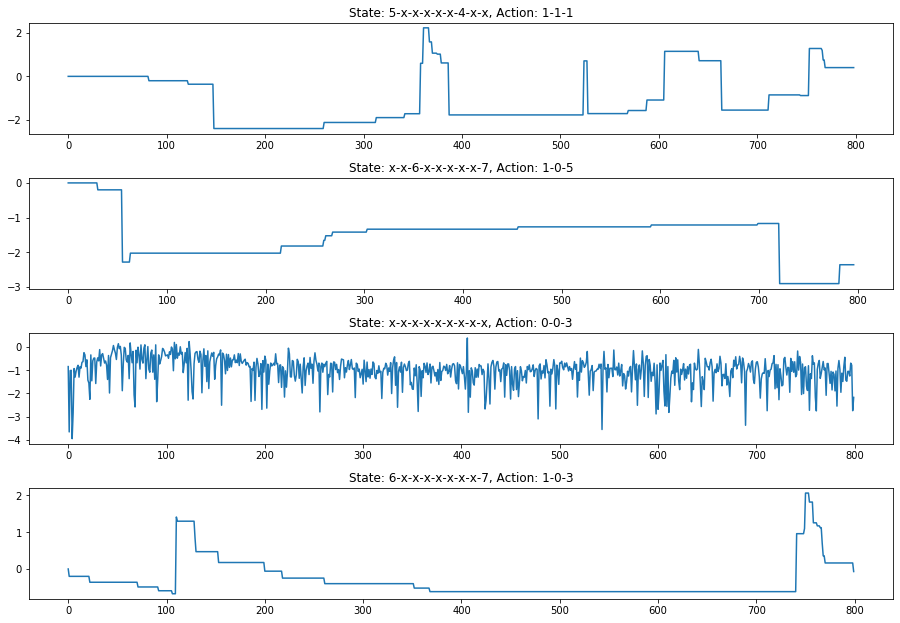

In [19]:
rows = 4
row_num = 0
episode_numbers = np.arange(threshold, EPISODES + 1, threshold)

fig, ax = plt.subplots(4,1, figsize=[15,10])


for index, key in enumerate(States_track.keys()):
    for action_key in States_track[key].keys():
        
        action_values = States_track[key][action_key]
        xaxis = np.arange(len(action_values))
        
        ax[row_num].plot(xaxis, action_values)
        ax[row_num].set_title("State: {}, Action: {}".format(key, action_key))
        
        row_num += 1
        
plt.subplots_adjust(left=0.1, 
                    bottom=0.1,  
                    right=0.9,  
                    top=0.9,  
                    wspace=0.4,  
                    hspace=0.4) 
plt.show()

### Epsilon - decay check

In [20]:
max_epsilon = 1.0
min_epsilon = 0.001
time = np.arange(0,5000000)
epsilon = []
for i in range(0,5000000):
    epsilon.append(min_epsilon + (max_epsilon - min_epsilon) * np.exp(-0.000001*i))

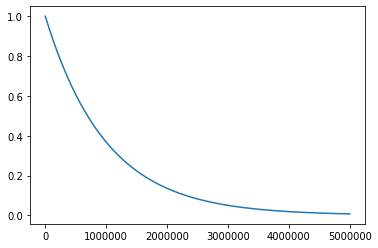

In [21]:
plt.plot(time, epsilon)
plt.show()